In [ ]:
# importing all the required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import skimage.io as io
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt
import PIL.Image
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

In [ ]:


def imshow(img, transform):
    """helper function to show data augmentation
    :param img: path of the image
    :param transform: data augmentation technique to apply"""
    
    img = PIL.Image.open(img)
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    ax[0].set_title(f'original image {img.size}')
    ax[0].imshow(img)
    img = transform(img)
    ax[1].set_title(f'transformed image {img.size}')
    ax[1].imshow(img)


**Scaling**
In scaling or resizing, the image is resized to the given size e.g. the width of the image can be doubled.

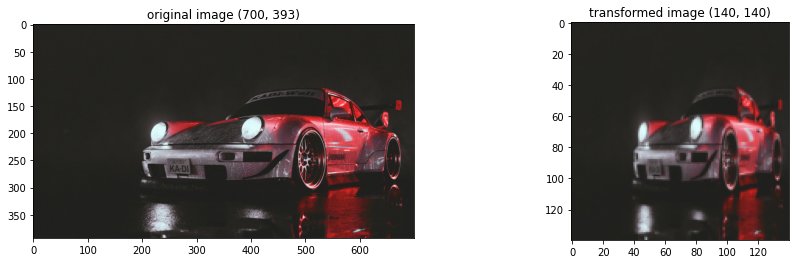

In [ ]:
loader_transform = transforms.Resize((140, 140))

imshow('/content/wp10006155.jpg', loader_transform)

**Cropping**
In cropping, a portion of the image is selected e.g. in the given example the center cropped image is returned.

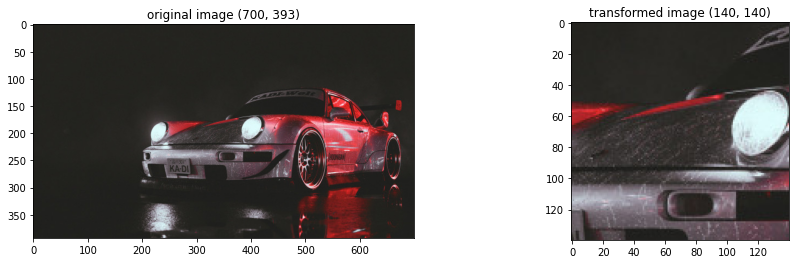

In [ ]:
loader_transform = transforms.CenterCrop(140)
imshow('/content/wp10006155.jpg', loader_transform)

**Flipping**
In flipping, the image is flipped horizontally or vertically.

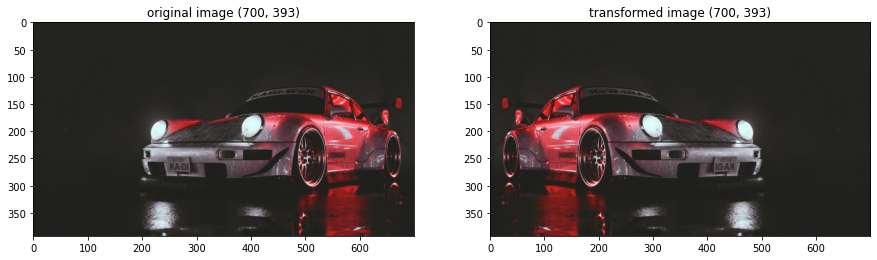

In [ ]:
# horizontal flip with probability 1 (default is 0.5)
loader_transform = transforms.RandomHorizontalFlip(p=1)
imshow('/content/wp10006155.jpg', loader_transform)

**Padding**
In padding, the image is padded with a given value on all sides.

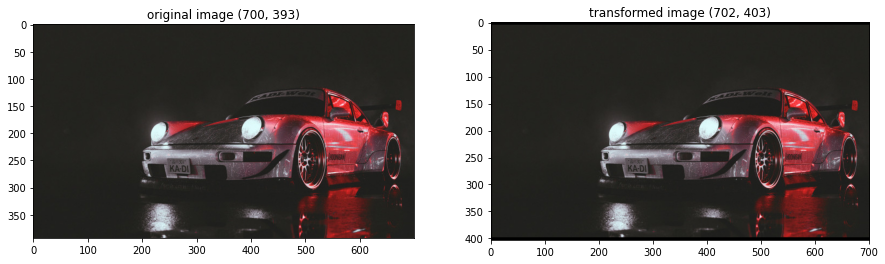

In [ ]:
# left, top, right, bottom
loader_transform = transforms.Pad((2, 5, 0, 5))
imshow('/content/wp10006155.jpg', loader_transform)

**Rotation**
The image is rotated randomly in rotation.

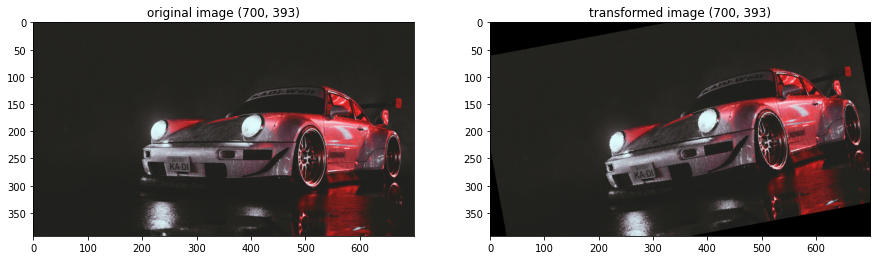

In [ ]:
loader_transform = transforms.RandomRotation(30)
imshow('/content/wp10006155.jpg', loader_transform)

**Translation**
In translation, the image is moved either along the x-axis or y-axis

**Affine transformation**
The affine transformation preserves points, straight lines, and planes. It can be used for scaling, tranlation, shearing, rotation etc.

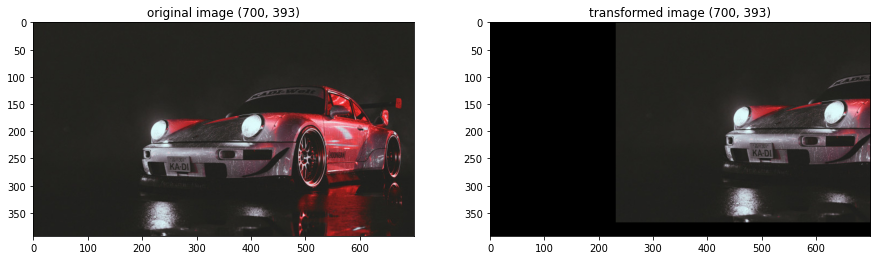

In [ ]:
# random affine transformation of the image keeping center invariant
loader_transform = transforms.RandomAffine(0, translate=(0.4, 0.5))
imshow('/content/wp10006155.jpg', loader_transform)

# 2nd way to do things ! 

(393, 700, 3)


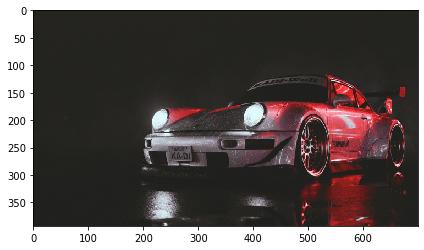

In [ ]:
# reading the image using its path
image = io.imread('/content/wp10006155.jpg')

# shape of the image
print(image.shape)

# displaying the image
io.imshow(image)

Rotated Image


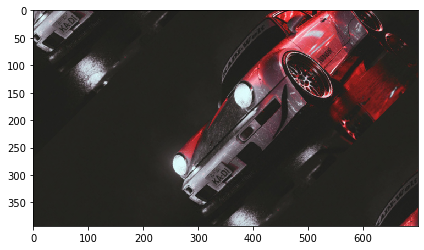

In [ ]:
print('Rotated Image')
#rotating the image by 45 degrees
rotated = rotate(image, angle=45, mode = 'wrap')
#plot the rotated image
io.imshow(rotated)

Text(0.5, 1.0, 'Wrap Shift')

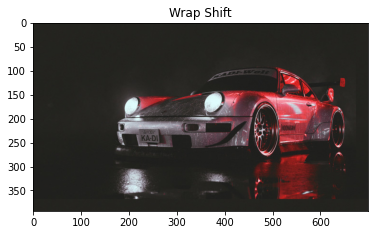

In [ ]:
#apply shift operation
transform = AffineTransform(translation=(25,25))
wrapShift = warp(image,transform,mode='wrap')
plt.imshow(wrapShift)
plt.title('Wrap Shift')

Text(0.5, 1.0, 'Left to Right Flipped')

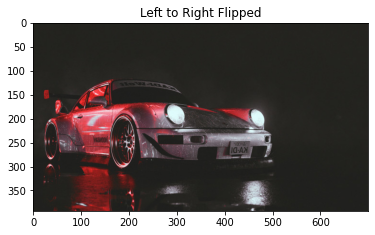

In [ ]:
#flip image left-to-right
flipLR = np.fliplr(image)

plt.imshow(flipLR)
plt.title('Left to Right Flipped')

Text(0.5, 1.0, 'Up Down Flipped')

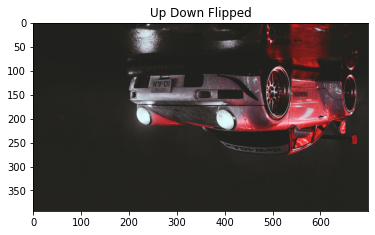

In [ ]:
#flip image up-to-down
flipUD = np.flipud(image)

plt.imshow(flipUD)
plt.title('Up Down Flipped')

Text(0.5, 1.0, 'Random Noise')

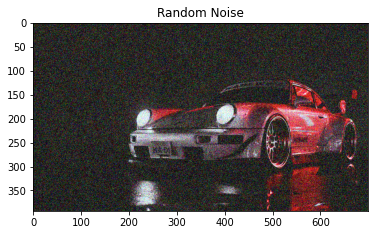

In [ ]:
#standard deviation for noise to be added in the image
sigma=0.155
#add random noise to the image
noisyRandom = random_noise(image,var=sigma**2)

plt.imshow(noisyRandom)
plt.title('Random Noise')

Text(0.5, 1.0, 'Blurred Image')

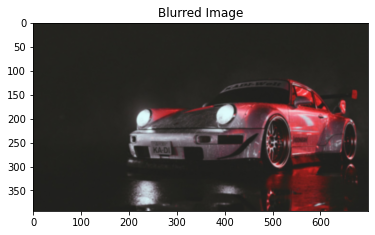

In [ ]:
#blur the image
blurred = gaussian(image,sigma=1,multichannel=True)

plt.imshow(blurred)
plt.title('Blurred Image')

Hue
Hue can be described of as the shade of the colors in an image

In [ ]:
img = PIL.Image.open('../input/lion-image/lion.jpg')
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

# brightness
loader_transform1 = transforms.ColorJitter(brightness=2)
img1 = loader_transform1(img)
ax[0, 0].set_title(f'brightness')
ax[0, 0].imshow(img1)

# contrast
loader_transform2 = transforms.ColorJitter(contrast=2)
img2 = loader_transform2(img)
ax[0, 1].set_title(f'contrast')
ax[0, 1].imshow(img2)

# saturation
loader_transform3 = transforms.ColorJitter(saturation=2)
img3 = loader_transform3(img)
ax[1, 0].set_title(f'saturation')
ax[1, 0].imshow(img3)
fig.savefig('color augmentation', bbox_inches='tight')

# hue
loader_transform4 = transforms.ColorJitter(hue=0.2)
img4 = loader_transform4(img)
ax[1, 1].set_title(f'hue')
ax[1, 1].imshow(img4)

fig.savefig('color augmentation', bbox_inches='tight')


FileNotFoundError: ignored